## SMS data , IRIS data Classification using Naive Bayes Classifier

The goal of the project is to
1.Classify the text messages as spam or ham for SMS dataset using  Multinomial Naive Bayes Classifier
2.Classify the species for IRIS datset using Gaussian naive bayes Classifier. 


In [70]:
# Imported the Required libraries
import nltk # Imports the library
nltk.download() #Download the necessary datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:

import csv
import os,re,csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import gensim
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt 
import plotly.plotly as py
import twitter
import json

In [7]:
import pandas as pd

### Data Extraction.

The dataset contains 5574 observations with 2 features type, text. Dataset downloaded from UCA machine learning repository.

In [8]:

path = 'C:\\Users\\kgajj\\Downloads\\sms_spam.csv'
messages = pd.read_csv(path)

In [11]:
messages.shape

(5574, 2)

In [12]:
# top 10 text messages 
messages['text'][0:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: text, dtype: object

In [14]:
messages.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [17]:
# grouping by type
messages.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

Dataset contains 2 types of text one is ham and other is ham. there are 4827 unique ham and 747 uniqie spam type messages. one message(Sorry, i'll call later) is repeated 30 times.and in spam class (please call our customer service) repeated 4 times.

In [21]:
#  Created a lenth column based on text length
messages['length']=messages['text'].apply(len)

In [22]:
messages.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001606E5813C8>,
      dtype=object)

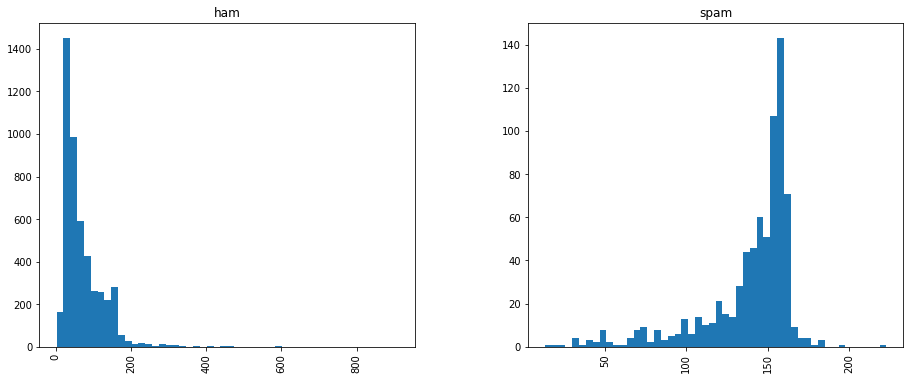

In [33]:
messages.hist(column='length',by='type',bins=50, figsize=(15,6))

From above plot ham messages length is mostly less than 200 characters and very few are more than 200 characters and less than 600 characters. In spam class most of hem are between 120 character to 160 character and rest of them are less than 120 characters.

In [26]:
# describing length of the text
messages['length'].describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [32]:
# checking the biggest messages of all
messages[messages['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [76]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
messages['text'].apply(text_process).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

After downloading library, with string.punctuation we can delete the punctuation like special characters in the text.
with .split() we can split the text to different strings with comma(,) seperation.
then with stop words it returns the clean by removing stop words from text.

In [79]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [81]:
# importing train_test_split method from sklearn.model  for splitting the data
from sklearn.model_selection import train_test_split
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['type'],test_size=0.2)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
## count vectorizer converts each string to integer vector
## TF- IDf couts the number of times the string repeated in the corpus
## MultinomialNB is a multinomial naive bayes

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [115]:
# training the model.
pipeline.fit(msg_train, class_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001606F03B8C8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [119]:
msg_train.head()

3058    Just woke up. Yeesh its late. But I didn't fal...
1577    No. To be nosy I guess. Idk am I over reacting...
614     THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
3926       As if i wasn't having enough trouble sleeping.
3970    Thanks for your message. I really appreciate y...
Name: text, dtype: object

In [116]:
# predicting 
predictions = pipeline.predict(msg_test)

In [117]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       959
        spam       1.00      0.70      0.82       156

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



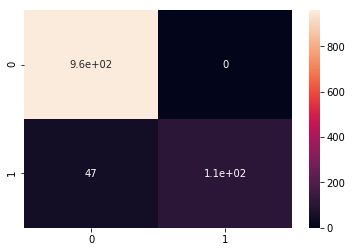

In [118]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)


## Iris dataset
Iris dataset contains 150 observations and 5 columns. As all the input variables are continuous we use gaussian naive bayes.   algorithm.  

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

###  Data extraction.
Iris data set is inbulit in scikit learn . so just loaded it from scikit.

In [120]:
iris = load_iris()
data = pd.DataFrame(X, columns=iris.feature_names)
data.shape

(150, 4)

In [98]:
# Create features' DataFrame and response Series
# Splitted the dataset into training and testing.
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [101]:
# Instantiate: create object
gnb = GaussianNB()

# Fit
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.9210526315789473

In [110]:
from sklearn import metrics

In [111]:

metrics.confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 11]], dtype=int64)

## conclusion

SMS dataset:

Naive bayes is very useful for text classification. This is used especially in fraud detection, spam detection. For SMS datset as it contains text we have to process text into some number format(vector). So for that we have to process the text by deleting punctuation and stop words and then converted to vector. with naive bayes it gave very good predictions.

IRIS Dataset:

Gaussian Naive bayes used when we have all continuous variables.as the datset is very clean , we need not to clean the datset here. with gaussian Naive bayes it gave almost 92% accuracy.

Some cases we can not use naive bayes when the input variables are dependent on each other. because naive bayes considers all the feature are independent of each other.